# Is it possible to stay in AirBnB's top-rated homes or in Seattle's best neighborhoods without spending big bucks?
## by Gonzalo Gomez Millan
---

## Business and data understanding

**`1. What are the months with the highest rate of Airbnb housing availability in Seattle? How do these home occupancy rates relate to price?`**

Data: calendar_seattle.csv

**`2. Are the most expensive neighbourhoods the ones with the best rating scores?`**

Data: listings_seattle.csv

**`3. Are the most expensive neighbourhoods the best located in Seattle?`**

Data: listings_seattle.csv

**`4. What are the characteristics of the neighbourhoods with the best rating that are most valued by customers?`**

Data: listings_seattle.csv

---
## Preliminary wrangling
- `calender_seattle.csv`: In this dataset we have the information of the price and availability of each house for each day of the year 2016.
- `listings_seattle.csv`: This dataset contains information about each of the houses of AirBnB in Seattle. This information is related to the house's name, a summary of the house, the neighbourhood, information about the host, house's location, the offered service, house type, prices, conditions of the renting, review scores and more information

In [1]:
# Import of all the packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb
import re

%matplotlib inline 

In [2]:
# Read the files
cal_seattle = pd.read_csv('calendar_seattle.csv')
list_seattle = pd.read_csv('listings_seattle.csv')
rev_seattle = pd.read_csv('reviews_seattle.csv')

### Seattle dataset

The analysis is going to be focused on the calender and listings files, so those are the ones which will be analyzed and cleaned.

#### 1. Seattle - Calender

**First glance**

In [3]:
cal_seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


> Although we will check this later, it can be seen that it is very likely that on days when the house is rented the price value is not in the dataset.

**Number of columns and rows**

In [4]:
cal_seattle.shape

(1393570, 4)

**Data types and missing values**

In [5]:
cal_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


**Duplicated rows**

In [6]:
cal_seattle[cal_seattle.duplicated()]

,listing_id,date,available,price


> Here we can observe three main issues:
>1. There are missing values in the variable "price".
>2. The data type of date is an object instead of "DateTime".
>2. The data type of the variable "price" should change to facilitate the analysis.

#### 2. Seattle listings

**First glance**

In [7]:
list_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


**Number of columns and rows**

In [8]:
list_seattle.shape

(3818, 92)

**Data types and missing values**

In [9]:
list_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

**Duplicated rows**

In [10]:
list_seattle[list_seattle.duplicated()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


> 1. Here it is possible to observe that some columns have missing values, although only the relevant ones for this analysis will be cleaned.
> 2. The column "license" has no information, so it should be removed.

- - - 

## Assessing and cleaning process

### 1. Seattle calender

In [11]:
cal_seattle_clean = cal_seattle.copy()

**Data types**

**1. Price**

The column `price` has missing values the days the house is not available. To modify the datatype, the missing values will be filled with zeros, so it is possible to continue having available the information the NaN is providing us (although it is the same than the information that the column `available` is providing us). 

It is necessary to make this modification outside the corresponding section because it is necessary to delete the NaN values to be able to modify the datatype.

In [12]:
cal_seattle_clean.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [13]:
cal_seattle_clean.price.fillna('0',inplace = True)

In [14]:
cal_seattle_clean.price = cal_seattle_clean.price.str.replace('$','').str.replace(',','').astype(float)

C:\Users\gonza\AppData\Local\Temp/ipykernel_17780/2812413449.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cal_seattle_clean.price = cal_seattle_clean.price.str.replace('$','').str.replace(',','').astype(float)


Let's check if the change has been correctly applied:

In [15]:
cal_seattle_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1393570 non-null  int64  
 1   date        1393570 non-null  object 
 2   available   1393570 non-null  object 
 3   price       1393570 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 42.5+ MB


**2. Date**

In [16]:
cal_seattle_clean.date = pd.to_datetime(cal_seattle_clean.date)
cal_seattle_clean.date

0         2016-01-04
1         2016-01-05
2         2016-01-06
3         2016-01-07
4         2016-01-08
             ...    
1393565   2016-12-29
1393566   2016-12-30
1393567   2016-12-31
1393568   2017-01-01
1393569   2017-01-02
Name: date, Length: 1393570, dtype: datetime64[ns]

In [17]:
cal_seattle_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       1393570 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


**Missing values**

>The first thing that we can observe is that all the missing value of the column `price` coincide with the days that the houses are not available.

>The missing value for `price` has been solved in the previous section.

In [18]:
cal_seattle_clean[(cal_seattle_clean.price.isna()) & (cal_seattle_clean.available=='t')]

,listing_id,date,available,price


In [19]:
cal_seattle_clean[(cal_seattle_clean.price.isna()==False) & (cal_seattle_clean.available=='f')]

,listing_id,date,available,price
2,241032,2016-01-06,f,0.0
3,241032,2016-01-07,f,0.0
4,241032,2016-01-08,f,0.0
5,241032,2016-01-09,f,0.0
6,241032,2016-01-10,f,0.0
...,...,...,...,...
1393565,10208623,2016-12-29,f,0.0
1393566,10208623,2016-12-30,f,0.0
1393567,10208623,2016-12-31,f,0.0
1393568,10208623,2017-01-01,f,0.0


### 2. Seattle listing

In [20]:
list_seattle_clean = list_seattle.copy()

**1. Data types**

In [21]:
list_seattle_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Continue with the cleaning process according to the analysis to be carried out

**1. price, weekly_price, monthly_price, security_deposit, cleaning_fee, extra_people**

For `price`, `weekly_price`, `monthly_price`, `security_deposit`, `cleaning_fee` and `extra_people`, the datatype will be changed from "object" to "int".

In [22]:
list_seattle_price_col = list_seattle_clean[['price','weekly_price','monthly_price','security_deposit','cleaning_fee',
                                             'extra_people']]
for col in list_seattle_price_col:
    list_seattle_clean[col] = list_seattle_clean[col].str.replace('$','').str.replace(',','').astype(float)

C:\Users\gonza\AppData\Local\Temp/ipykernel_17780/1132829526.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  list_seattle_clean[col] = list_seattle_clean[col].str.replace('$','').str.replace(',','').astype(float)


Let's check the modifications:

In [23]:
list_seattle_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

**Missing values**

**1. Columns with object data type**

There is some missing information in the columns with object data type. In order to avoid any problem with the analysis, the NaN values will be filled with the message "No information".

In [24]:
col_list_seattle_clean = list_seattle_clean.select_dtypes('object').columns

In [25]:
for col in col_list_seattle_clean:
    list_seattle_clean[col].fillna('No information', inplace = True)

Let's check if the modification has been correctly applied:

In [26]:
list_seattle_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3818 non-null   object 
 6   space                             3818 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             3818 non-null   object 
 10  notes                             3818 non-null   object 
 11  transit                           3818 non-null   object 
 12  thumbn

**2. License**

In this case there is no information in the column license, so it will be dropped from the data set.

In [27]:
list_seattle_clean = list_seattle_clean.drop(columns = 'license')

Let's check if the change has been correctly applied:

In [28]:
list_seattle_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3818 non-null   object 
 6   space                             3818 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             3818 non-null   object 
 10  notes                             3818 non-null   object 
 11  transit                           3818 non-null   object 
 12  thumbn

**3. Scores**

The number of missing values in the review scores is about 17%. Since there is no information which can help us to find a better way to fill them, they will be filled with the median of the column to avoid problems in the analysis.

<Figure size 1440x1440 with 0 Axes>

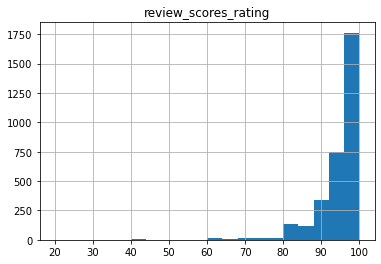

In [29]:
plt.figure(figsize = [20,20])
list_seattle_clean.hist('review_scores_rating',bins=20);

In [30]:
list_seattle_clean[list_seattle_clean.review_scores_rating.isna()].head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,No information,A charming apartment that sits atop Queen Anne...,none,No information,...,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN
18,7735464,https://www.airbnb.com/rooms/7735464,20160104002432,2016-01-04,Queen Anne Getaway Near Seattle!,The second room in our spacious 2BR / 2 Bath a...,No information,The second room in our spacious 2BR / 2 Bath a...,none,No information,...,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN


In [31]:
list_seattle_clean[list_seattle_clean.review_scores_rating.isna()][['review_scores_rating','review_scores_accuracy',
                                                                    'review_scores_cleanliness','review_scores_checkin',
                                                                   'review_scores_communication','review_scores_location',
                                                                   'review_scores_value']].head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
col_list_rev = [['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                 'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']]

for col in col_list_rev:
    list_seattle_clean[col] = list_seattle_clean[col].fillna(list_seattle_clean[col].median())

Let's check if the changes has been correctly applied:

In [33]:
list_seattle_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3818 non-null   object 
 6   space                             3818 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             3818 non-null   object 
 10  notes                             3818 non-null   object 
 11  transit                           3818 non-null   object 
 12  thumbn

**4. Bathrooms**

In the case of the missing values of the bathrooms, it can be observed that they coincide with houses with one or, in some cases, two bedrooms, so they could be filled with the median (1).

In [34]:
list_seattle_clean[list_seattle_clean['bathrooms'].isna()][['bedrooms','bathrooms','beds']]

,bedrooms,bathrooms,beds
1242,1.0,NaN,2.0
1314,1.0,NaN,2.0
1357,2.0,NaN,3.0
1378,1.0,NaN,1.0
1961,1.0,NaN,NaN
1975,1.0,NaN,1.0
2048,2.0,NaN,4.0
2096,1.0,NaN,1.0
2306,1.0,NaN,2.0
2408,1.0,NaN,1.0


In [35]:
list_seattle_clean.bathrooms = list_seattle_clean.bathrooms.fillna(list_seattle_clean.bathrooms.median())

Let's check if the change has been correctly applied:

In [36]:
list_seattle_clean[list_seattle_clean.bathrooms.isna()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month





**5. Bedrooms**

From the number of beds and bathrooms, it is possible to conclude that the missing values for the bedrooms is 1.

In [37]:
list_seattle_clean[list_seattle_clean['bedrooms'].isna()][['bedrooms','bathrooms','beds']]

,bedrooms,bathrooms,beds
1429,NaN,1.0,1.0
1492,NaN,1.0,1.0
1493,NaN,1.0,2.0
1853,NaN,1.0,1.0
2619,NaN,1.0,1.0
2915,NaN,1.0,1.0


In [38]:
list_seattle_clean.bedrooms = list_seattle_clean.bedrooms.fillna(1)

Let's check if the changes has been correctly applied:

In [39]:
list_seattle_clean[list_seattle_clean.bedrooms.isna()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


**6. Beds**

In the missing value for the beds , we can observe that this is a house with only one bedroom, so this missing value can be filled with the median (1).

In [40]:
list_seattle_clean[list_seattle_clean['beds'].isna()][['bedrooms','bathrooms','beds']]

,bedrooms,bathrooms,beds
1961,1.0,1.0,NaN


In [41]:
list_seattle_clean['beds'] = list_seattle_clean['beds'].fillna(list_seattle_clean['beds'].median())

Let's check if the modifications has been correctly applied:

In [42]:
list_seattle_clean[list_seattle_clean['beds'].isna()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


**7. Square_feet**

Since there are only 97 values (2.5% of the total) and there is no enough information to fill the missing values, **this column can be dropped from the data set.**

In [43]:
drop_cols = list_seattle_clean[['square_feet','requires_license', 'state', 'jurisdiction_names', 'experiences_offered']]
list_seattle_clean.drop(columns = drop_cols ,inplace = True)

Let's check the modifications and the final status of the data set for the analysis:

In [44]:
list_seattle_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 86 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3818 non-null   object 
 6   space                             3818 non-null   object 
 7   description                       3818 non-null   object 
 8   neighborhood_overview             3818 non-null   object 
 9   notes                             3818 non-null   object 
 10  transit                           3818 non-null   object 
 11  thumbnail_url                     3818 non-null   object 
 12  medium

**8. host_listings_count and host_total_listings_count**

The two missing values both for host_listing_count and for host_total_listing_count **will be filled with the median value** to avoid problems in the analysis. It is possible to observe that this really affects two rows, so it would have a huge impact in the analysis.

In [45]:
list_seattle_clean[(list_seattle_clean.host_listings_count.isna())&(list_seattle_clean.host_total_listings_count.isna())][['host_listings_count','host_total_listings_count']]

,host_listings_count,host_total_listings_count
1297,NaN,NaN
1419,NaN,NaN


In [46]:
list_seattle_clean[['host_listings_count','host_total_listings_count']].head()

,host_listings_count,host_total_listings_count
0,3.0,3.0
1,6.0,6.0
2,2.0,2.0
3,1.0,1.0
4,2.0,2.0


In [47]:
host_list_col = [['host_listings_count','host_total_listings_count']]
for col in host_list_col:
    list_seattle_clean[col] = list_seattle_clean[col].fillna(list_seattle_clean[col].median())

Let's check the applied changes:

In [48]:
list_seattle_clean[(list_seattle_clean.host_listings_count.isna()) & 
                   (list_seattle_clean.host_total_listings_count.isna())][['host_listings_count',
                                                                           'host_total_listings_count']]

,host_listings_count,host_total_listings_count


In [49]:
list_seattle_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 86 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3818 non-null   object 
 6   space                             3818 non-null   object 
 7   description                       3818 non-null   object 
 8   neighborhood_overview             3818 non-null   object 
 9   notes                             3818 non-null   object 
 10  transit                           3818 non-null   object 
 11  thumbnail_url                     3818 non-null   object 
 12  medium

In [50]:
list_seattle_clean.neighbourhood_cleansed.value_counts()

Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
Pinehurst              4
South Beacon Hill      4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 87, dtype: int64

**Categorical data**

There are many variables which can be turned into categorical data in order to facilitate the subsequent analysis.

In [51]:
cat_col = list_seattle_clean[['bed_type','instant_bookable',
                              'cancellation_policy','require_guest_profile_picture',
                              'require_guest_phone_verification']].columns
for col in cat_col:
    list_seattle_clean[col] = list_seattle_clean[col].astype('category')

Let's check the changes:

In [52]:
list_seattle_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 86 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   id                                3818 non-null   int64   
 1   listing_url                       3818 non-null   object  
 2   scrape_id                         3818 non-null   int64   
 3   last_scraped                      3818 non-null   object  
 4   name                              3818 non-null   object  
 5   summary                           3818 non-null   object  
 6   space                             3818 non-null   object  
 7   description                       3818 non-null   object  
 8   neighborhood_overview             3818 non-null   object  
 9   notes                             3818 non-null   object  
 10  transit                           3818 non-null   object  
 11  thumbnail_url                     3818 non-null   object

In [53]:
list_seattle_clean.review_scores_checkin.value_counts()

10.0    3302
9.0      423
8.0       64
7.0       12
6.0        9
4.0        5
2.0        2
5.0        1
Name: review_scores_checkin, dtype: int64

**Meaningless data** 

**1. guests_included**

Since it does not make sense that no guest is included in the reservation and considering that the vast majority of the houses with this error have only one bed, it is assumed that there are the same number of guests included as beds.

In [54]:
list_seattle_clean[['price','guests_included']].describe()

,price,guests_included
count,3818.000000,3818.000000
mean,127.976166,1.672603
std,90.250022,1.311040
min,20.000000,0.000000
25%,75.000000,1.000000
50%,100.000000,1.000000
75%,150.000000,2.000000
max,1000.000000,15.000000


In [55]:
list_seattle_clean.guests_included.value_counts()

1     2275
2      989
4      237
0       92
3       80
6       71
5       28
8       24
7       14
10       2
9        2
11       1
15       1
13       1
12       1
Name: guests_included, dtype: int64

In [56]:
list_seattle_clean[list_seattle_clean['guests_included']==0]['beds'].value_counts()

1.0    68
2.0    19
3.0     3
5.0     1
4.0     1
Name: beds, dtype: int64

In [57]:
list_seattle_clean['guests_included'] = list_seattle_clean.apply(lambda x: x['beds'] if x['guests_included'] == 0 else x['guests_included'], axis=1)

Let's check if the modification has been correctly applied.

In [58]:
list_seattle_clean[list_seattle_clean['guests_included']==0]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


**Data Engineering**

In order to facilitate the subsequent analysis, the price/person can be easily calculated and will help to compare between houses.

In [59]:
# Calculo del precio por persona
list_seattle_clean['price_person'] = (list_seattle_clean['price'])/list_seattle_clean['guests_included']
list_seattle_clean.price_person.describe()

count    3818.000000
mean       92.477499
std        74.614865
min         2.333333
25%        48.750000
50%        70.000000
75%       107.000000
max      1000.000000
Name: price_person, dtype: float64

- - - 

## Univariate exploration

### 0. Correlation heatmap

For `price` it is possible to observe a relatively good correlation with `accommodates`, `bathrooms`, `bedrooms`, `beds`, `weekly_price`, `monthly_price`, `security_deposit`, `cleaning_fee`and `guests_included`. 

The same parameters correlate with `price_person` but in a somewhat weaker way.

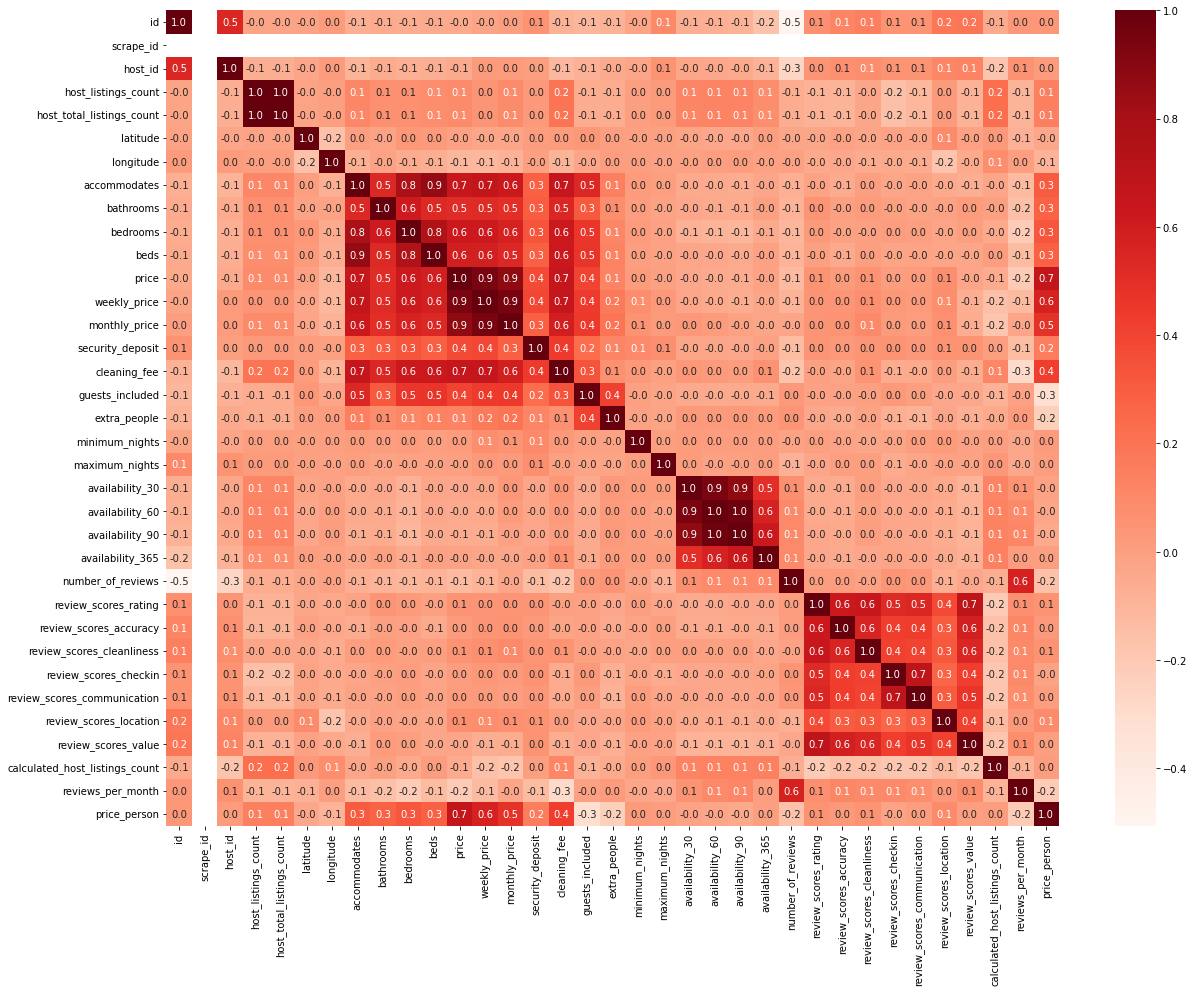

In [60]:
plt.figure(figsize=[20,15])
sb.heatmap(list_seattle_clean.corr(),annot=True,fmt='.1f',cmap='Reds');

### 1. Seattle calender


From this graph we can conclude that AirBnB homes are clearly more days available than booked.

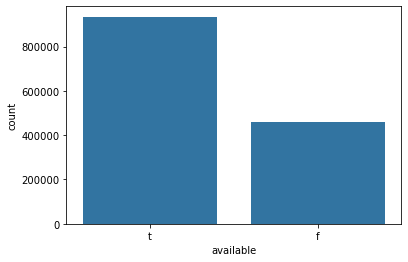

In [61]:
color_base = sb.color_palette()[0]
sb.countplot(data = cal_seattle_clean, x='available', color = color_base);

### 2. Seattle listing


**1. Prices (daily, weekly, monthly and price/person)**

In [62]:
list_seattle_clean[['price','weekly_price','monthly_price']].describe()

,price,weekly_price,monthly_price
count,3818.000000,2009.000000,1517.000000
mean,127.976166,788.481832,2613.336190
std,90.250022,532.352269,1722.267981
min,20.000000,100.000000,500.000000
25%,75.000000,455.000000,1512.000000
50%,100.000000,650.000000,2200.000000
75%,150.000000,950.000000,3150.000000
max,1000.000000,6300.000000,19500.000000


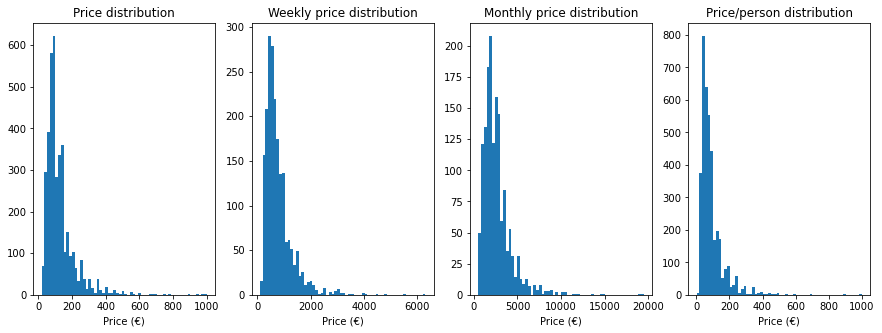

In [63]:
plt.figure(figsize=[15,5])

plt.subplot(1,4,1)
plt.hist(data = list_seattle_clean, x='price',bins=60)
plt.title('Price distribution')
plt.xlabel('Price (€)')

plt.subplot(1,4,2)
plt.hist(data = list_seattle_clean, x='weekly_price', bins=60)
plt.title('Weekly price distribution')
plt.xlabel('Price (€)')

plt.subplot(1,4,3)
plt.hist(data = list_seattle_clean, x='monthly_price', bins=60)
plt.title('Monthly price distribution')
plt.xlabel('Price (€)')

plt.subplot(1,4,4)
plt.hist(data = list_seattle_clean, x='price_person', bins=60)
plt.title('Price/person distribution')
plt.xlabel('Price (€)');

**2. Review scores**

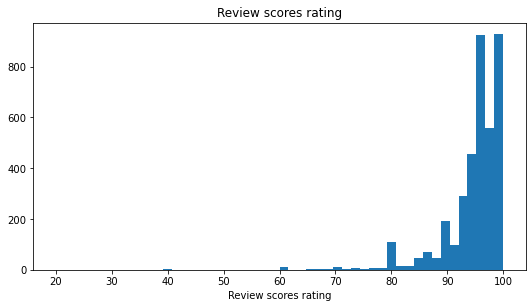

In [64]:
plt.figure(figsize=[30,10])
plt.subplot(2,3,1)
plt.hist(data = list_seattle_clean, x='review_scores_rating',bins = 50)
plt.title('Review scores rating')
plt.xlabel('Review scores rating');

''

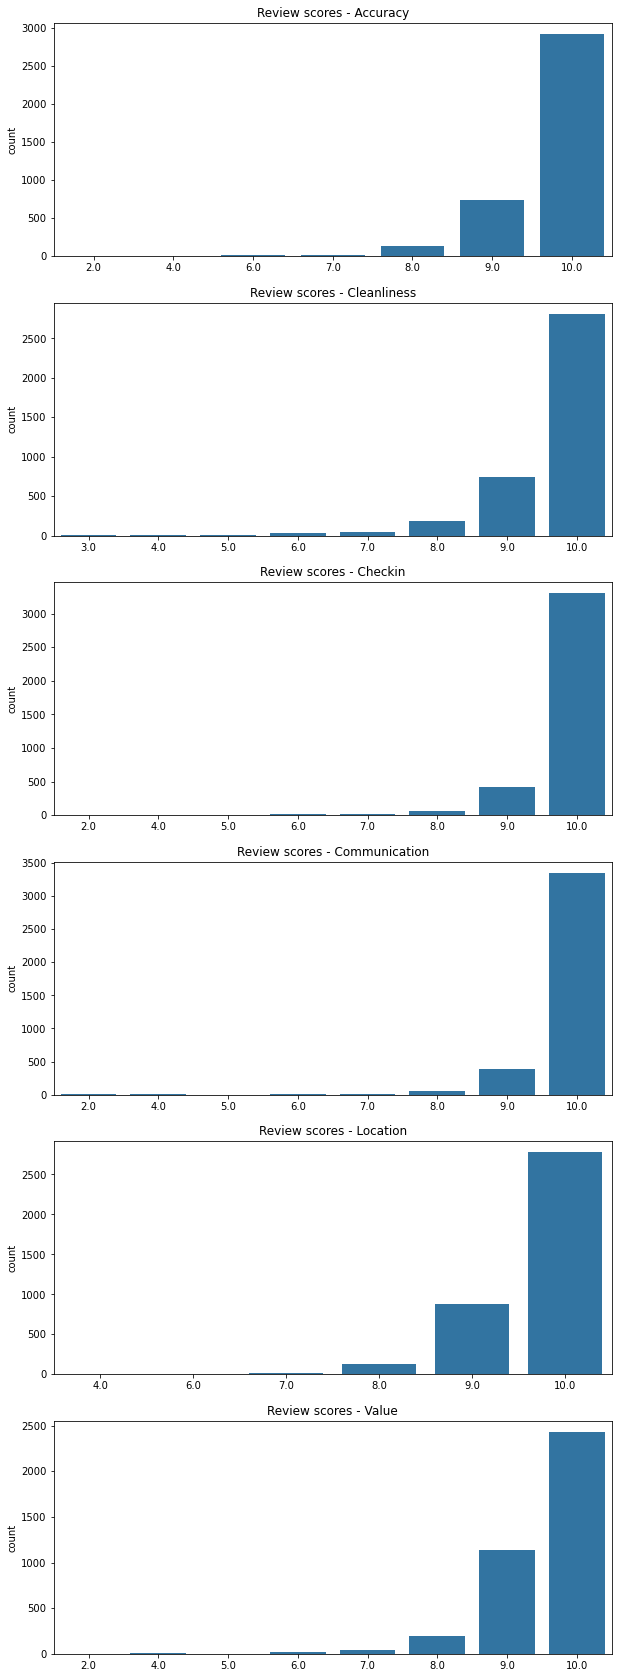

In [65]:
plt.figure(figsize=[10,30])
plt.subplot(6,1,1)
color_base = sb.color_palette()[0]
sb.countplot(data = list_seattle_clean, x='review_scores_accuracy',color = color_base)
plt.title('Review scores - Accuracy')
plt.xlabel('')

plt.subplot(6,1,2)
sb.countplot(data = list_seattle_clean, x='review_scores_cleanliness',color = color_base)
plt.title('Review scores - Cleanliness')
plt.xlabel('')


plt.subplot(6,1,3)
sb.countplot(data = list_seattle_clean, x='review_scores_checkin',color = color_base)
plt.title('Review scores - Checkin')
plt.xlabel('')


plt.subplot(6,1,4)
sb.countplot(data = list_seattle_clean, x='review_scores_communication',color = color_base)
plt.title('Review scores - Communication')
plt.xlabel('')


plt.subplot(6,1,5)
sb.countplot(data = list_seattle_clean, x='review_scores_location',color = color_base)
plt.title('Review scores - Location')
plt.xlabel('')


plt.subplot(6,1,6)
sb.countplot(data = list_seattle_clean, x='review_scores_value',color = color_base)
plt.title('Review scores - Value')
plt.xlabel('')

;

---

## Bivariate exploration

**1. Price-scores**

This plot show us that the most of the best scores are concentrated in the houses with lower prices.

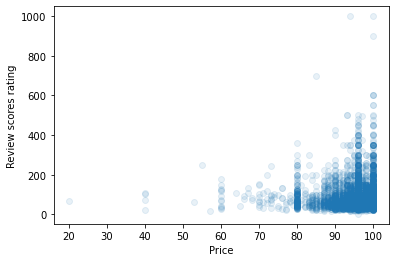

In [66]:
plt.scatter(data = list_seattle_clean, y='price_person', x='review_scores_rating',alpha=0.1)
plt.xlabel('Price')
plt.ylabel('Review scores rating');

**2. Bathrooms/bedrooms/beds - review_scores_rating**

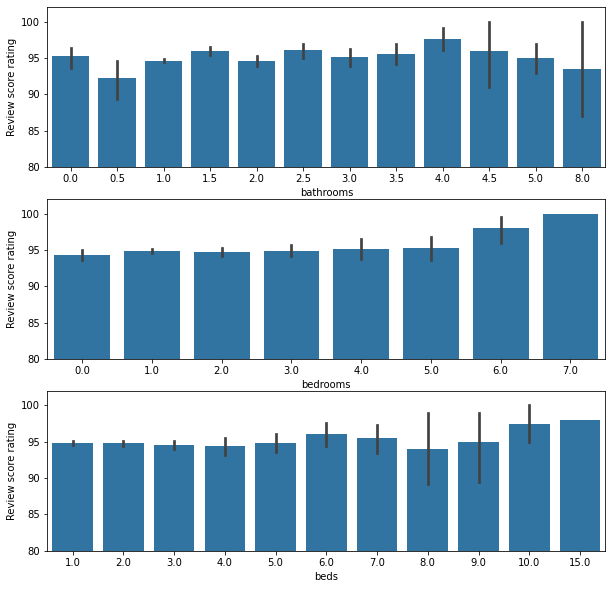

In [67]:
plt.figure(figsize=[10,10])

plt.subplot(3,1,1)
sb.barplot(data = list_seattle_clean, x='bathrooms', y='review_scores_rating', color = color_base)
plt.ylabel('Review score rating')
plt.ylim(80,102)

plt.subplot(3,1,2)
sb.barplot(data = list_seattle_clean, x='bedrooms', y='review_scores_rating', color = color_base)
plt.ylabel('Review score rating')
plt.ylim(80,102)


plt.subplot(3,1,3)
sb.barplot(data = list_seattle_clean, x='beds', y='review_scores_rating', color = color_base)
plt.ylabel('Review score rating')
plt.ylim(80,102);

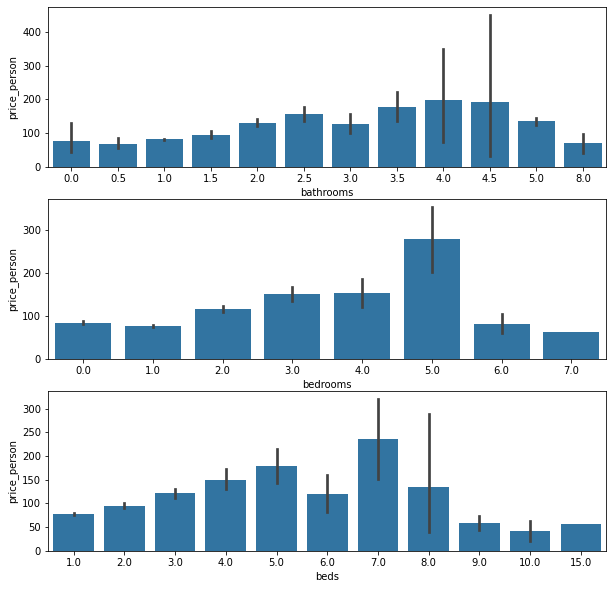

In [68]:
plt.figure(figsize=[10,10])

plt.subplot(3,1,1)
sb.barplot(data = list_seattle_clean, x='bathrooms', y='price_person', color = color_base)

plt.subplot(3,1,2)
sb.barplot(data = list_seattle_clean, x='bedrooms', y='price_person', color = color_base)

plt.subplot(3,1,3)
sb.barplot(data = list_seattle_clean, x='beds', y='price_person', color = color_base);

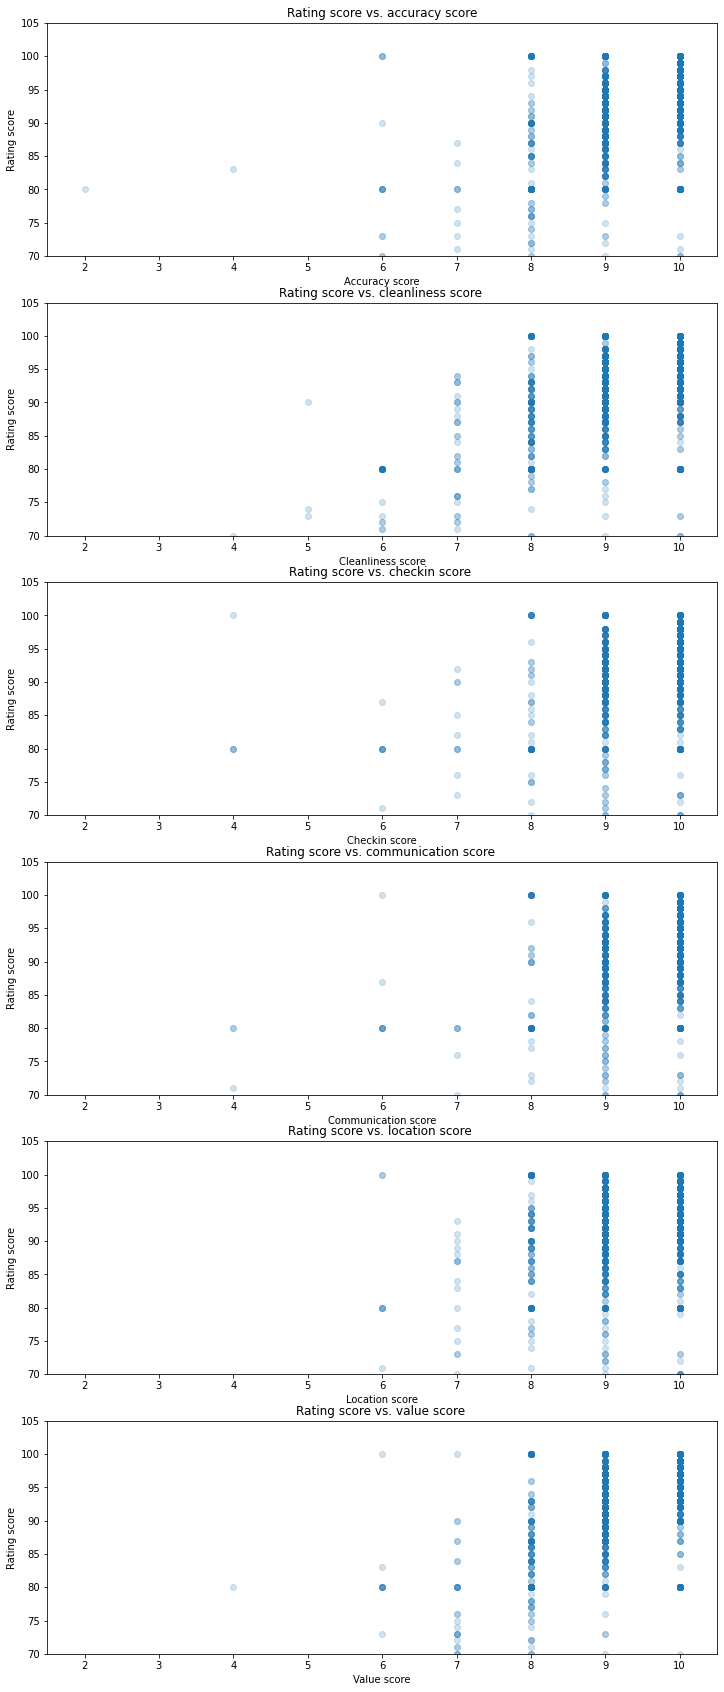

In [69]:
plt.figure(figsize=[12,30])

plt.subplot(6,1,1)
plt.scatter(data = list_seattle_clean, y = 'review_scores_rating', x = 'review_scores_accuracy',alpha = 0.2)
plt.title('Rating score vs. accuracy score')
plt.xlim(1.5,10.5)
plt.ylim(70,105)
plt.xlabel('Accuracy score')
plt.ylabel('Rating score')

plt.subplot(6,1,2)
plt.scatter(data = list_seattle_clean, y = 'review_scores_rating', x = 'review_scores_cleanliness',alpha = 0.2);
plt.title('Rating score vs. cleanliness score ')
plt.xlim(1.5,10.5)
plt.ylim(70,105)
plt.xlabel('Cleanliness score')
plt.ylabel('Rating score')

plt.subplot(6,1,3)
plt.scatter(data = list_seattle_clean, y = 'review_scores_rating', x = 'review_scores_checkin',alpha = 0.2);
plt.title('Rating score vs. checkin score ')
plt.xlim(1.5,10.5)
plt.ylim(70,105)
plt.xlabel('Checkin score')
plt.ylabel('Rating score')

plt.subplot(6,1,4)
plt.scatter(data = list_seattle_clean, y = 'review_scores_rating', x = 'review_scores_communication',alpha = 0.2);
plt.title('Rating score vs. communication score ')
plt.xlim(1.5,10.5)
plt.ylim(70,105)
plt.xlabel('Communication score')
plt.ylabel('Rating score')

plt.subplot(6,1,5)
plt.scatter(data = list_seattle_clean, y = 'review_scores_rating', x = 'review_scores_location',alpha = 0.2);
plt.title('Rating score vs. location score ')
plt.xlim(1.5,10.5)
plt.ylim(70,105)
plt.xlabel('Location score')
plt.ylabel('Rating score')

plt.subplot(6,1,6)
plt.scatter(data = list_seattle_clean, y = 'review_scores_rating', x = 'review_scores_value',alpha = 0.2)
plt.title('Rating score vs. value score ')
plt.xlim(1.5,10.5)
plt.ylim(70,105)
plt.xlabel('Value score')
plt.ylabel('Rating score');

In [70]:
list_seattle_clean[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                    'review_scores_communication','review_scores_location']].describe()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,9.699057,9.632268,9.823468,9.842064,9.676008
std,0.649705,0.744855,0.547703,0.522425,0.591225
min,2.000000,3.000000,2.000000,2.000000,4.000000
25%,10.000000,9.000000,10.000000,10.000000,9.000000
50%,10.000000,10.000000,10.000000,10.000000,10.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


***

## Main analysis

### 1. What are the months with the highest rate of Airbnb housing availability in Seattle? How do these home occupancy rates relate to price?

In [71]:
seattle_availability_dummies = pd.get_dummies(data=cal_seattle_clean,prefix = 'Available')
seattle_availability_dummies

,listing_id,date,price,Available_f,Available_t
0,241032,2016-01-04,85.0,0,1
1,241032,2016-01-05,85.0,0,1
2,241032,2016-01-06,0.0,1,0
3,241032,2016-01-07,0.0,1,0
4,241032,2016-01-08,0.0,1,0
...,...,...,...,...,...
1393565,10208623,2016-12-29,0.0,1,0
1393566,10208623,2016-12-30,0.0,1,0
1393567,10208623,2016-12-31,0.0,1,0
1393568,10208623,2017-01-01,0.0,1,0


In [72]:
seattle_availability_dummies['Month'] = seattle_availability_dummies['date'].dt.month
seattle_availability_dummies.head()

,listing_id,date,price,Available_f,Available_t,Month
0,241032,2016-01-04,85.0,0,1,1
1,241032,2016-01-05,85.0,0,1,1
2,241032,2016-01-06,0.0,1,0,1
3,241032,2016-01-07,0.0,1,0,1
4,241032,2016-01-08,0.0,1,0,1


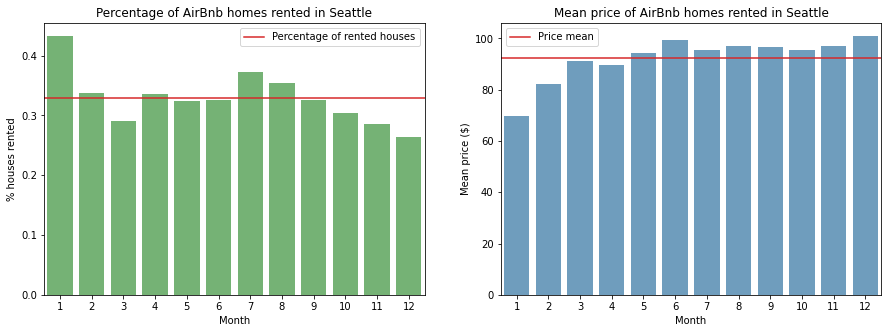

In [73]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
seattle_availability_month = seattle_availability_dummies.groupby('Month',as_index = False)[['Available_f','Available_t']].mean()
mean_seattle_availability_month = seattle_availability_month.Available_f.mean()
seattle_availability_plot = sb.barplot(data = seattle_availability_month, x = 'Month',y = 'Available_f', color = sb.color_palette()[2],alpha=0.7)
seattle_availability_plot.axhline(mean_seattle_availability_month,color=sb.color_palette()[3],label='Percentage of rented houses')
plt.title('Percentage of AirBnb homes rented in Seattle')
plt.ylabel('% houses rented')
plt.legend();

plt.subplot(1,2,2)
seattle_price_month = seattle_availability_dummies.groupby('Month',as_index = False)['price'].mean()
mean_seattle_price_month = seattle_price_month.price.mean()
seattle_price_plot = sb.barplot(data = seattle_price_month, x = 'Month',y = 'price', color = sb.color_palette()[0],alpha=0.7)
seattle_price_plot.axhline(mean_seattle_price_month,color=sb.color_palette()[3],label='Price mean')
plt.title('Mean price of AirBnb homes rented in Seattle')
plt.ylabel('Mean price ($)')
plt.legend();

plt.savefig('AirBnB_rent.png')


> We can observe that there are three months that clearly exceed the occupancy rate of homes available on AirBnb: January, February, April, July and August. The occupancy rate is especially low in the months of March, October, November and December.

> In the case of the average monthly price, we can observe an important incongruity: the months with the highest home rental rates do not correspond to the most expensive months. That is, what should be considered as high season is not only not the most expensive month, but it is clearly the cheapest.

### 2. Are the most expensive neighbourhoods the ones with the best rating scores?

The first thing to consider is the mean price per person to use it as a reference. The `average price per person is $92.48`.

In [74]:
list_seattle_clean.price_person.mean()

92.47749858909502

The second is to see which are the most expensive neighborhoods per person:

In [75]:
top10_price_seattle = list_seattle_clean.groupby('neighbourhood',as_index=False)[['price_person','review_scores_rating']].mean().sort_values(by='price_person',ascending=False)[:10]
top10_price_seattle

,neighbourhood,price_person,review_scores_rating
0,Alki,162.706522,95.956522
31,Industrial District,140.555556,93.000000
4,Belltown,137.851716,93.627451
45,Montlake,130.403509,96.684211
58,Pioneer Square,123.553571,93.000000
12,Central Business District,121.505144,94.666667
56,Pike Place Market,121.418803,94.589744
70,South Lake Union,120.214286,94.952381
80,Windermere,116.350000,97.200000
38,Madison Park,114.656250,94.750000


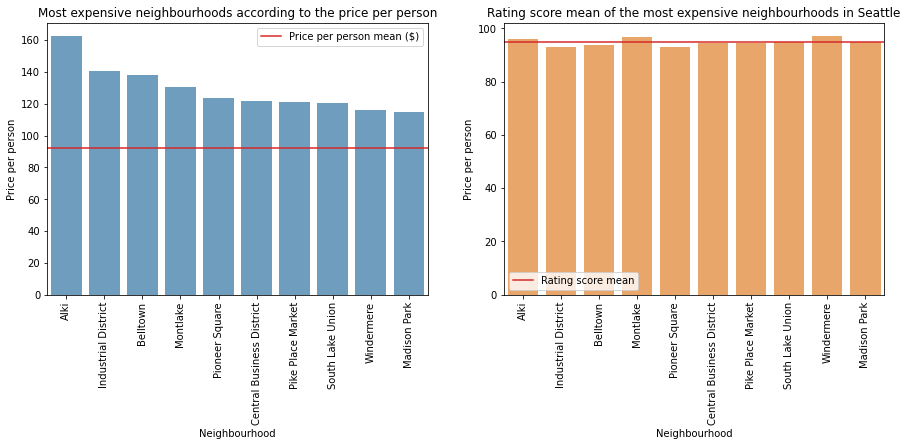

In [76]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
graph_highest_price = sb.barplot(data = top10_price_seattle, x='neighbourhood',y='price_person', color = sb.color_palette()[0],alpha=0.7)
graph_highest_price.axhline(list_seattle_clean.price_person.mean(),color=sb.color_palette()[3],label='Price per person mean ($)')
plt.legend()
plt.xticks(rotation=90)
plt.title('Most expensive neighbourhoods according to the price per person')
plt.ylabel('Price per person')
plt.xlabel('Neighbourhood')

plt.subplot(1,2,2)
graph_highest_price_score = sb.barplot(data=top10_price_seattle, x='neighbourhood',y='review_scores_rating', color = sb.color_palette()[1],alpha=0.7)
graph_highest_price_score.axhline(list_seattle_clean.review_scores_rating.mean(),color=sb.color_palette()[3],label='Rating score mean')
plt.legend(loc='lower left')
plt.xticks(rotation=90)
plt.title('Rating score mean of the most expensive neighbourhoods in Seattle')
plt.ylabel('Price per person')
plt.xlabel('Neighbourhood');

plt.savefig('AirBnB_rating_score_price_person.png')


>It can be seen that the most expensive AirBnB neighborhoods in Seattle have a mean rating score similar to Seattle's mean rating score. However, we can observe that in some cases this mean rating score is even below the average, as it can be the case of "Industrial District" or "Pioneer Square".

In [77]:
top10_rating_seattle = list_seattle_clean.groupby('neighbourhood',as_index=False)[['price_person','review_scores_rating']].mean().sort_values(by='review_scores_rating',ascending=False)[:10]
top10_rating_seattle

,neighbourhood,price_person,review_scores_rating
1,Arbor Heights,68.000000,98.000000
81,Yesler Terrace,85.645833,97.333333
28,High Point,73.727273,97.272727
80,Windermere,116.350000,97.200000
27,Harrison/Denny-Blaine,82.410256,97.000000
39,Madrona,112.422321,96.950000
22,Genesee,109.250000,96.758621
45,Montlake,130.403509,96.684211
21,Gatewood,95.898148,96.555556
63,Riverview,49.312500,96.375000


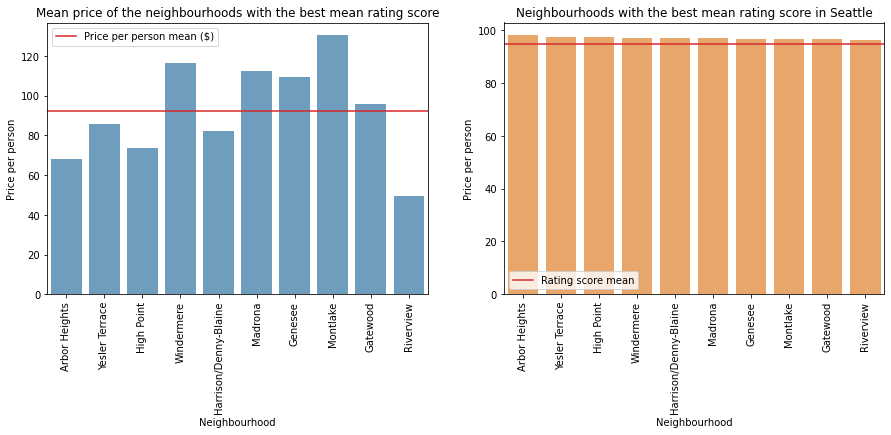

In [78]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
graph_highest_rating = sb.barplot(data = top10_rating_seattle, x='neighbourhood',y='price_person', color = sb.color_palette()[0],alpha=0.7)
graph_highest_rating.axhline(list_seattle_clean.price_person.mean(),color=sb.color_palette()[3],label='Price per person mean ($)')
plt.legend()
plt.xticks(rotation=90)
plt.title('Mean price of the neighbourhoods with the best mean rating score')
plt.ylabel('Price per person')
plt.xlabel('Neighbourhood')

plt.subplot(1,2,2)
graph_highest_rating_score = sb.barplot(data=top10_rating_seattle, x='neighbourhood',y='review_scores_rating', color = sb.color_palette()[1],alpha=0.7)
graph_highest_rating_score.axhline(list_seattle_clean.review_scores_rating.mean(),color=sb.color_palette()[3],label='Rating score mean')
plt.legend(loc='lower left')
plt.xticks(rotation=90)
plt.title('Neighbourhoods with the best mean rating score in Seattle')
plt.ylabel('Price per person')
plt.xlabel('Neighbourhood');

plt.savefig('AirBnB_rating_score_high.png')


C:\Users\gonza\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


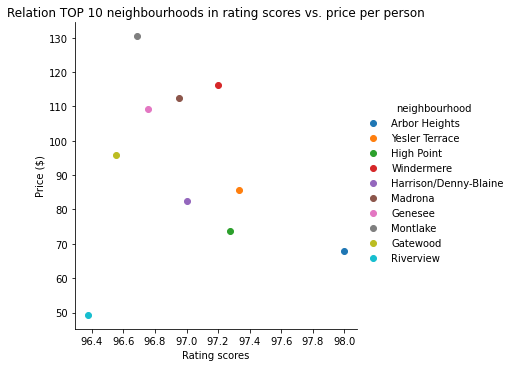

In [79]:
g = sb.FacetGrid(data = top10_rating_seattle[:10], hue = 'neighbourhood', size = 5 )
g.map(plt.scatter, 'review_scores_rating','price_person')
g.add_legend()
plt.xlabel('Rating scores')
plt.ylabel('Price ($)')
plt.title('Relation TOP 10 neighbourhoods in rating scores vs. price per person');

plt.savefig('AirBnB_rating_score_high_points.png')

> If we look at it from the point of view of the neighborhoods with the best mean score, we can see that many of them (4 out of 10) are below the average price in Seattle. In fact, the three neighborhoods with the best mean rating score have a mean price per person well below Seattle's mean price per person.  In the case of Riverview, the mean price per person is about half of Seattle's mean price per person.

### 3. Are the most expensive neighbourhoods the best located in Seattle?

In [80]:
top10_price_location_seattle = list_seattle_clean.groupby('neighbourhood',as_index=False)[['price_person','review_scores_location']].mean().sort_values(by='price_person',ascending=False)[:10]
top10_price_location_seattle

,neighbourhood,price_person,review_scores_location
0,Alki,162.706522,9.913043
31,Industrial District,140.555556,9.000000
4,Belltown,137.851716,9.828431
45,Montlake,130.403509,9.789474
58,Pioneer Square,123.553571,9.142857
12,Central Business District,121.505144,9.925926
56,Pike Place Market,121.418803,9.923077
70,South Lake Union,120.214286,9.761905
80,Windermere,116.350000,9.900000
38,Madison Park,114.656250,9.750000


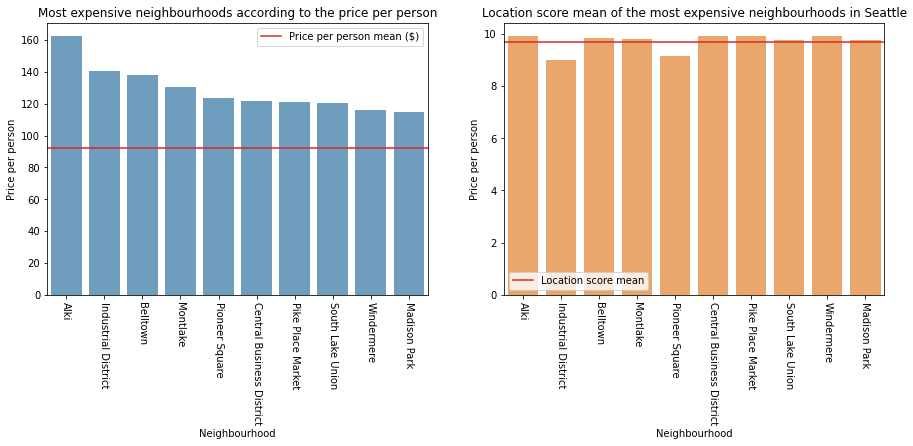

In [81]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
graph_highest_price = sb.barplot(data = top10_price_location_seattle, x='neighbourhood',y='price_person', color = sb.color_palette()[0],alpha=0.7)
graph_highest_price.axhline(list_seattle_clean.price_person.mean(),color=sb.color_palette()[3],label='Price per person mean ($)')
plt.legend()
plt.xticks(rotation=-90)
plt.title('Most expensive neighbourhoods according to the price per person')
plt.ylabel('Price per person')
plt.xlabel('Neighbourhood')

plt.subplot(1,2,2)
graph_highest_price_score = sb.barplot(data=top10_price_location_seattle, x='neighbourhood',y='review_scores_location', color = sb.color_palette()[1],alpha=0.7)
graph_highest_price_score.axhline(list_seattle_clean.review_scores_location.mean(),color=sb.color_palette()[3],label='Location score mean')
plt.legend(loc='lower left')
plt.xticks(rotation=-90)
plt.title('Location score mean of the most expensive neighbourhoods in Seattle')
plt.ylabel('Price per person')
plt.xlabel('Neighbourhood');

plt.savefig('AirBnB_rating_location_expensive.png')

>If we look at the most expensive neighbourhoods in Seattle we can see that most of them have a mean location score higher than Seattle's mean location score, although there are two important exceptions such as "Industrial District" and "Pioneer Square", whose mean location score is well below Seattle's mean location score.

In [82]:
top10_location_seattle = list_seattle_clean.groupby('neighbourhood',as_index=False)[['price_person','review_scores_location']].mean().sort_values(by='review_scores_location',ascending=False)[:10]
top10_location_seattle

,neighbourhood,price_person,review_scores_location
51,North College Park,99.000000,10.000000
55,Pike Market,92.000000,10.000000
17,Fairmount Park,46.250000,10.000000
65,Roxhill,60.000000,10.000000
21,Gatewood,95.898148,9.944444
12,Central Business District,121.505144,9.925926
56,Pike Place Market,121.418803,9.923077
24,Green Lake,98.605769,9.923077
37,Lower Queen Anne,105.982932,9.915663
0,Alki,162.706522,9.913043


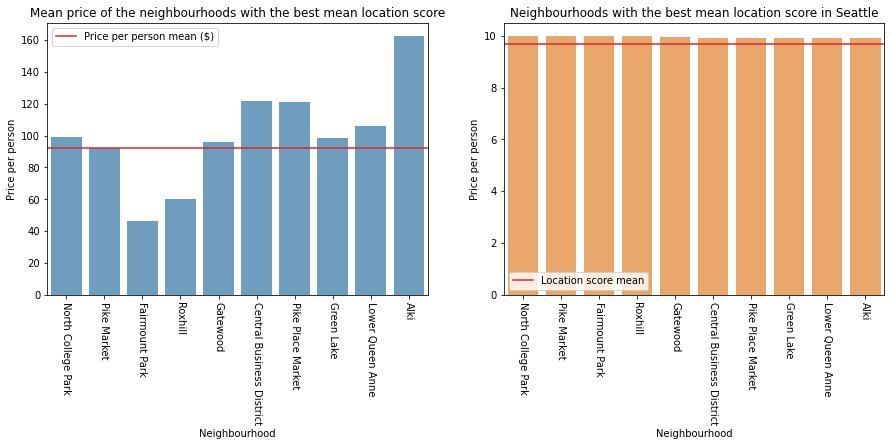

In [83]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
graph_highest_rating = sb.barplot(data = top10_location_seattle, x='neighbourhood',y='price_person', color = sb.color_palette()[0],alpha=0.7)
graph_highest_rating.axhline(list_seattle_clean.price_person.mean(),color=sb.color_palette()[3],label='Price per person mean ($)')
plt.legend()
plt.xticks(rotation=-90)
plt.title('Mean price of the neighbourhoods with the best mean location score')
plt.ylabel('Price per person')
plt.xlabel('Neighbourhood')

plt.subplot(1,2,2)
graph_highest_rating_score = sb.barplot(data=top10_location_seattle, x='neighbourhood',y='review_scores_location', color = sb.color_palette()[1],alpha=0.7)
graph_highest_rating_score.axhline(list_seattle_clean.review_scores_location.mean(),color=sb.color_palette()[3],label='Location score mean')
plt.legend(loc='lower left')
plt.xticks(rotation=-90)
plt.title('Neighbourhoods with the best mean location score in Seattle')
plt.ylabel('Price per person')
plt.xlabel('Neighbourhood');

plt.savefig('AirBnB_rating_location_high.png')


C:\Users\gonza\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


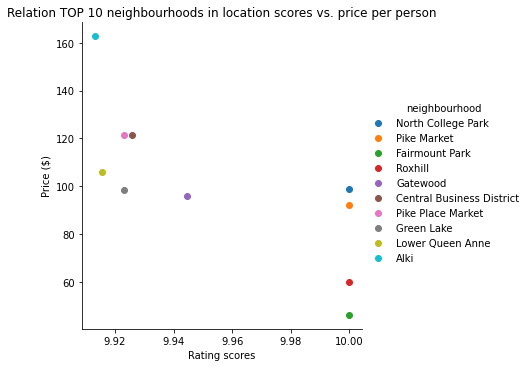

In [84]:
g = sb.FacetGrid(data = top10_location_seattle[:10], hue = 'neighbourhood', size = 5 )
g.map(plt.scatter, 'review_scores_location','price_person')
g.add_legend()
plt.xlabel('Rating scores')
plt.ylabel('Price ($)')
plt.title('Relation TOP 10 neighbourhoods in location scores vs. price per person');

plt.savefig('AirBnB_rating_score_high_points.png')


> If we focus on the neighborhoods with the best mean location score, we can observe that most of them have a higher price per person than the majority. However, we can observe that there are two neighborhoods with a mean location score well below the mean location score of Seattle and they have the third and fourth best mean location score, "Fairmont Park" and "Roxhill", so they are great options for someone who wants to stay in Seattle in a good location without spending too much money.

### 4. What are the characteristics of the neighbourhoods with the best ratings that are most valued by customers?

In [85]:
seattle_top10_scores = list_seattle_clean.groupby('neighbourhood',as_index = True)[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                    'review_scores_communication','review_scores_location','review_scores_value']].mean().sort_values(by='review_scores_rating',ascending=False)[:10]
seattle_top10_scores

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
neighbourhood,,,,,,,
Arbor Heights,98.000000,9.666667,9.666667,10.000000,10.000000,8.666667,9.333333
Yesler Terrace,97.333333,9.916667,9.416667,10.000000,10.000000,9.583333,9.833333
High Point,97.272727,10.000000,10.000000,10.000000,10.000000,9.636364,9.818182
Windermere,97.200000,9.900000,9.700000,9.900000,9.800000,9.900000,9.800000
Harrison/Denny-Blaine,97.000000,9.923077,9.769231,10.000000,10.000000,9.769231,9.769231
Madrona,96.950000,9.850000,9.825000,9.850000,9.900000,9.825000,9.850000
Genesee,96.758621,9.827586,9.827586,9.965517,9.931034,9.896552,9.793103
Montlake,96.684211,9.789474,9.842105,9.894737,9.842105,9.789474,9.736842
Gatewood,96.555556,9.833333,9.888889,10.000000,9.944444,9.944444,9.888889


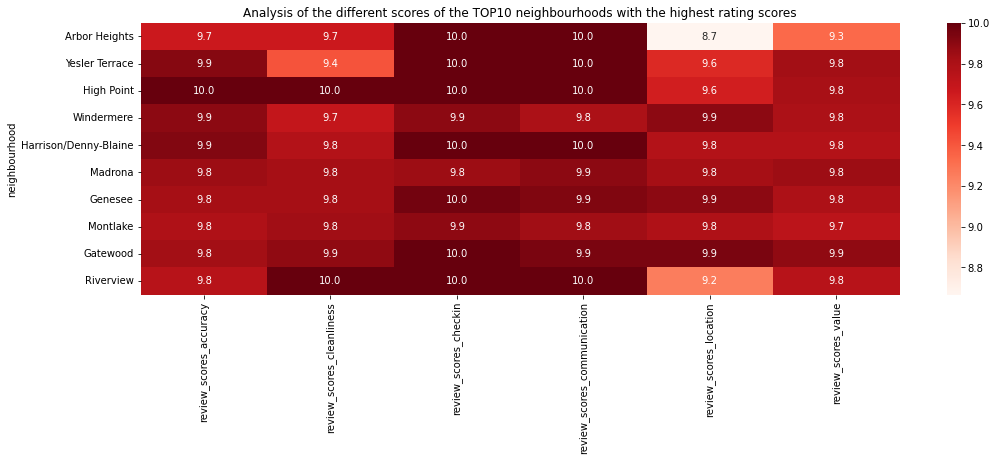

In [86]:
plt.figure(figsize = [17,5])
sb.heatmap(data = seattle_top10_scores[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                    'review_scores_communication','review_scores_location','review_scores_value']],cmap='Reds',annot=True,fmt='.1f');
plt.title('Analysis of the different scores of the TOP10 neighbourhoods with the highest rating scores');

plt.savefig('AirBnB_rating_heatmap.png')


In [87]:
seattle_top10_scores.mean()

review_scores_rating           97.012945
review_scores_accuracy          9.845680
review_scores_cleanliness       9.793614
review_scores_checkin           9.961025
review_scores_communication     9.941758
review_scores_location          9.626106
review_scores_value             9.757291
dtype: float64

> The results obtained in the analysis so far have led me to wonder if there is any common factor among the neighborhoods with the best mean rating score. In the heatmap we can see that the ratings are very high in practically all the fields, but it stands out that the checkin and communication score are really high, being close to 10.0 in practically all the cases, which demonstrates the importance of the implication of the host in the final valuation of the guest.